In [33]:
import nltk

In [26]:
#Select to two texts and create term-document matrix.
 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
 
text1='Socrates was a Greek philosopher from Athens who is credited as a founder of Western philosophy and the first moral philosopher of the ethical tradition of thought​.'
text2='Gautama Buddha, popularly known as Lord Buddha or the Buddha, was an ascetic, a religious leader and teacher who lived in ancient India'
 
df= pd.DataFrame({'Socrates': [text1], 'Buddha': [text2]})
 
vectorizer = CountVectorizer()
vec = vectorizer.fit_transform(df.iloc[0])
 

df_result = pd.DataFrame(vec.toarray().transpose(),index=vectorizer.get_feature_names())
df_result.columns = df.columns

print(df_result)


             Socrates  Buddha
an                  0       1
ancient             0       1
and                 1       1
as                  1       1
ascetic             0       1
athens              1       0
buddha              0       3
credited            1       0
ethical             1       0
first               1       0
founder             1       0
from                1       0
gautama             0       1
greek               1       0
in                  0       1
india               0       1
is                  1       0
known               0       1
leader              0       1
lived               0       1
lord                0       1
moral               1       0
of                  3       0
or                  0       1
philosopher         2       0
philosophy          1       0
popularly           0       1
religious           0       1
socrates            1       0
teacher             0       1
the                 2       1
thought             1       0
tradition 

In [27]:
#Calculate similarity of two texts based on vocabulary.

from difflib import SequenceMatcher
 
m = SequenceMatcher(None, text1, text2)
m.ratio()

0.2733333333333333

In [52]:
#Select a text. Tokenize it,using a Tagger, calculate its vocabulary size and lexical diversity.


tokens = nltk.word_tokenize(text1)
print(tokens)

# Using a Tagger for the first 6 items from the tokens list 
tagged = nltk.pos_tag(tokens)
print(tagged[0:6])


['Socrates', 'was', 'a', 'Greek', 'philosopher', 'from', 'Athens', 'who', 'is', 'credited', 'as', 'a', 'founder', 'of', 'Western', 'philosophy', 'and', 'the', 'first', 'moral', 'philosopher', 'of', 'the', 'ethical', 'tradition', 'of', 'thought\u200b', '.']
[('Socrates', 'NNS'), ('was', 'VBD'), ('a', 'DT'), ('Greek', 'JJ'), ('philosopher', 'NN'), ('from', 'IN')]


In [30]:
#Calculate its vocabulary size

print("The size of vocabulary: "+ str(len(set(text1))))

The size of vocabulary: 27


In [31]:
#Calculate lexical diversity.
unique_word = len(set(text1))/len(text1) * 100
print("The lexical diversity: "+ str(round(unique_word,2)) + "%")

The lexical diversity: 16.36%


In [38]:
#Create a sentiment analysis algorithmuse using the movie reviews database that is part of the NLTK corpus. 
#The movie_reviews data set has the reviews, and they are labeled already as positive or negative.
#useing random packge to shuffle up the data set becuse it's very highly orderd.
import random
from nltk.corpus import movie_reviews

docs =[]
for category in movie_reviews.categories():
     for fileid in movie_reviews.fileids(category):
        docs.append((list(movie_reviews.words(fileid)), category))

random.shuffle(docs)
#first item will contain a tuple consisting of list of words and then if it's positive or negative 
print(docs[1])




(['synopsis', ':', 'a', 'maniac', ',', 'crazed', 'by', 'virulent', 'microphage', ',', 'slaughters', 'more', 'than', 'twenty', 'people', ',', 'including', 'a', 'street', 'gang', 'and', 'heavily', '-', 'armed', 'troops', ',', 'with', 'a', 'small', 'knife', '.', 'even', 'with', 'a', 'handgun', ',', 'however', ',', 'he', 'can', "'", 't', 'take', 'out', 'the', 'two', 'cops', 'who', 'are', 'after', 'him', ',', 'despite', 'having', 'shot', 'one', 'of', 'them', 'a', 'total', 'of', 'seven', 'times', '.', 'comments', ':', 'the', 'most', 'notable', 'aspect', 'of', 'adrenalin', ':', 'fear', 'the', 'rush', 'is', 'that', 'it', 'marks', 'a', 'striking', 'career', 'move', 'for', 'natasha', 'henstridge', '.', 'not', 'only', 'does', 'she', 'manage', 'to', 'keep', 'all', 'her', 'clothes', 'on', '(', 'her', 'trademark', 'in', 'earlier', 'films', 'such', 'as', 'species', 'and', 'maximum', 'risk', 'was', 'to', 'strip', 'naked', 'as', 'often', 'as', 'possible', ')', ',', 'but', 'she', 'actually', 'puts', 'on

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595), (')', 11781), ('(', 11664), ('as', 11378), ('with', 10792), ('for', 9961), ('his', 9587), ('this', 9578), ('film', 9517), ('i', 8889), ('he', 8864), ('but', 8634), ('on', 7385), ('are', 6949), ('t', 6410), ('by', 6261), ('be', 6174), ('one', 5852), ('movie', 5771), ('an', 5744), ('who', 5692), ('not', 5577), ('you', 5316), ('from', 4999), ('at', 4986), ('was', 4940), ('have', 4901), ('they', 4825), ('has', 4719), ('her', 4522), ('all', 4373), ('?', 3771), ('there', 3770), ('like', 3690), ('so', 3683), ('out', 3637)]
184


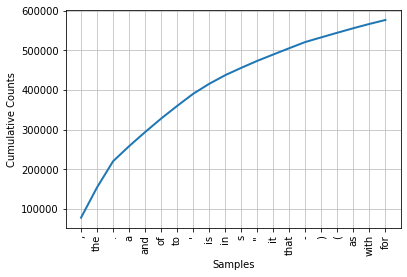

In [40]:
#compile every word and review by taking that list of words. 
#clasify which words has more negative words or positive words.
all_words = []
for w in movie_reviews.words():
#Make sure everything is  normalized by converting all words to a lowercase 
    all_words.append(w.lower())

#Find the most popular words which appeared in positive text and negative one.    
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(50))
print(all_words["amazing"])

# Cumulative frequency plot
all_words.plot(20, cumulative=True)


In [42]:
#To apply calssification I should convert words to features using NLTK 
#I will take a sample of the words and let it be the first 4000 words
#it will good enough to encompass a lot of words that are commonly used and then train against these top 4000 words finding out which word is most common and negative or positive.
word_features = list(all_words.keys())[:4000]

def get_features(doc):
    doc_words = set(doc)
    features = {}
    for w in word_features:
        features[w] = (w in doc_words)
    return features


print((get_features(movie_reviews.words('neg/cv000_29416.txt'))))

{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': True, 'package': True, 'which': True, 'is': True, 'makes': True, 'this': True, 'review': True, 'even': True, 'harder': True, 'wri

In [51]:
# Train Classifier 

featuresets = [(get_features(review), category) for (review,category) in docs]

# training-set (first 1500 will train against)
#how many times these most common words appear in negative and positive reviews
#if they appear significantly more on negative reviews that means that word is very important to a negative review and the same thing for positive reviwes

training_set = featuresets[1500:]

# evaluation-set(secound 1500 will test against)
# feed the feature sets and the machin will tell me what's the category then compare it with known category then see how aacurate is the machine dose
testing_set = featuresets[:1500]




# Naive Bayes Classifier Algorithm
classifier = nltk.NaiveBayesClassifier.train(training_set)
#check the accuracy percentage of Naive Bayes Algorithm
print(nltk.classify.accuracy(classifier, training_set)*100)

#show the 20 most informative features 
classifier.show_most_informative_features(20)



98.0
Most Informative Features
                    alas = True              neg : pos    =     10.9 : 1.0
                stunning = True              pos : neg    =     10.4 : 1.0
               stupidity = True              neg : pos    =      9.4 : 1.0
              remembered = True              pos : neg    =      8.0 : 1.0
                   chick = True              neg : pos    =      7.9 : 1.0
               spielberg = True              pos : neg    =      7.4 : 1.0
                    mess = True              neg : pos    =      7.4 : 1.0
                 failure = True              neg : pos    =      7.0 : 1.0
                    crap = True              neg : pos    =      6.5 : 1.0
                   reads = True              neg : pos    =      6.4 : 1.0
                   devil = True              neg : pos    =      6.4 : 1.0
                anywhere = True              neg : pos    =      6.4 : 1.0
                    lame = True              neg : pos    =      6.3 

In [ ]:
#We noticed that the accuracy percentage of Naive Bayes Algorithm is 98%
#The most important word is "alas" and it appears 10.9 times more often that it doesn't a positive review
